In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\Emfsupport.kwb1\Downloads\Data\Python\unsupervised learning\test\hr_train.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.42,0.46,2,150,3,0,1,0,sales,medium
1,0.66,0.77,2,171,2,0,0,0,technical,medium
2,0.55,0.49,5,240,3,0,0,0,technical,high
3,0.22,0.88,4,213,3,1,0,0,technical,medium
4,0.20,0.72,6,224,4,0,1,0,technical,medium


In this session we will cluster satisfaction_level and average_monthly_hours worked and see how the different clusters are related

In [4]:
check_data=data[['satisfaction_level','average_montly_hours']]

In [5]:
check_data.mean()

satisfaction_level        0.612683
average_montly_hours    201.059815
dtype: float64

In [6]:
#need to standarize the variables
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [7]:
cluster_data=pd.DataFrame(st.fit_transform(check_data),columns=list(check_data.columns))

In [8]:
cluster_data.head()

,satisfaction_level,average_montly_hours
0,-0.775178,-1.022076
1,0.190359,-0.601714
2,-0.252179,0.779475
3,-1.579792,0.239009
4,-1.660253,0.459199


In [9]:
cluster_data.agg(['mean','std'])

,satisfaction_level,average_montly_hours
mean,9.745514e-17,-1.999187e-16
std,1.000048e+00,1.000048e+00


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [14]:
n_clusters=[2,3,4,5,6,7,8,9]
for n in n_clusters:
    kmean=KMeans(n_clusters=n)
    kmean.fit(cluster_data)
    print('no of clusters:',n,'silhouette_score:',silhouette_score(cluster_data,kmean.labels_))

no of clusters: 2 silhouette_score: 0.38265421899506225
no of clusters: 3 silhouette_score: 0.4498299119051457
no of clusters: 4 silhouette_score: 0.451149677961845
no of clusters: 5 silhouette_score: 0.4353806487628493
no of clusters: 6 silhouette_score: 0.4123931590103682
no of clusters: 7 silhouette_score: 0.4201449368132986
no of clusters: 8 silhouette_score: 0.41056220522587095
no of clusters: 9 silhouette_score: 0.40544946978803753


In [15]:
# the best silhouette score achieved through 4 no of clusters.lets run the model with 4 clusters
kmean=KMeans(n_clusters=4)
kmean.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
cluster_data['Kmean_clusters']=kmean.labels_

In [18]:
cluster_data['Kmean_clusters'].value_counts()

1    3898
3    2864
0    2605
2    1132
Name: Kmean_clusters, dtype: int64

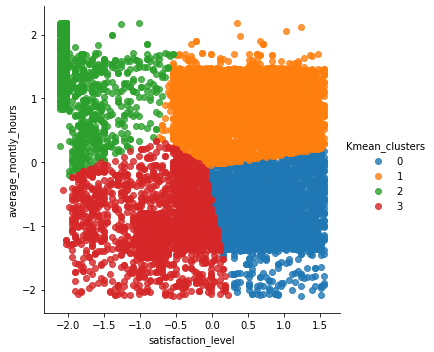

In [21]:
# lets visualize
sns.lmplot(x='satisfaction_level',y='average_montly_hours',hue='Kmean_clusters',data=cluster_data,fit_reg=False)

In [ ]:
#from the above 4 clusters we can say that
#1.cluster 0 has higher satisfation lavel and they worked a certain time.
#2. cluster 1 has higher satisfaction level and they worked for a long time.
#3.cluster 2 has lower satisfaction level and they worked for a long time.
#4. cluster 3 has lower satisfaction level and they worked less working hours.